In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print("[INFO] loading MNIST (full) dataset...")
dataset = datasets.mnist.load_data()

[INFO] loading MNIST (full) dataset...


In [4]:
(trainX, trainY), (testX, testY) = dataset
trainX, testX = trainX/255.0, testX/255.0
trainX, testX = trainX.reshape(trainX.shape[0], 784), testX.reshape(testX.shape[0], 784)

In [5]:
trainX.shape

(60000, 784)

In [6]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [7]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [8]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 2.2807 - accuracy: 0.1657 - val_loss: 2.2484 - val_accuracy: 0.2606
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2170 - accuracy: 0.3869 - val_loss: 2.1776 - val_accuracy: 0.4091
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 2.1366 - accuracy: 0.5401 - val_loss: 2.0807 - val_accuracy: 0.5716
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 2.0198 - accuracy: 0.6157 - val_loss: 1.9361 - val_accuracy: 0.6493
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 1.8497 - accuracy: 0.6654 - val_loss: 1.7331 - val_accuracy: 0.7029
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 1.6288 - accuracy: 0.7035 - val_loss: 1.4932 - val_accuracy: 0.7276
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 1.3942 - accuracy: 0.7372 - val_loss: 1.

Epoch 58/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3205 - accuracy: 0.9079 - val_loss: 0.3083 - val_accuracy: 0.9112
Epoch 59/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3188 - accuracy: 0.9080 - val_loss: 0.3070 - val_accuracy: 0.9117
Epoch 60/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3171 - accuracy: 0.9088 - val_loss: 0.3053 - val_accuracy: 0.9122
Epoch 61/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3155 - accuracy: 0.9092 - val_loss: 0.3040 - val_accuracy: 0.9130
Epoch 62/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3139 - accuracy: 0.9093 - val_loss: 0.3025 - val_accuracy: 0.9133
Epoch 63/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3123 - accuracy: 0.9097 - val_loss: 0.3014 - val_accuracy: 0.9138
Epoch 64/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3107 - accuracy: 0.9104 - val_loss: 0.2997 - val_accuracy:

In [11]:
# evaluate the network
print("[INFO] evaluating network..")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), 
      predictions.argmax(axis=1), 
      target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network..
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.90      0.88      0.89       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



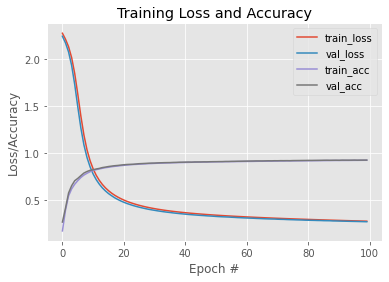

In [14]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()